# SAS Viya Python API

[SWAT Functionality](https://developer.sas.com/apis/swat/python/1.0.0/api.html)

[CAS Actions Documentation](https://go.documentation.sas.com/doc/en/pgmsascdc/v_033/allprodsactions/actionSetsByName.htm)

# Data

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| BAD       | Target     | Binary            | 1 = applicant defaulted on loan or delinquent, 0 = applicant paid loan |
| CLAGE     | Input      | Interval          | Age of oldest credit line in months                                    |
| CLNO      | Input      | Interval          | Number of credit lines                                                 |
| DEBTINC   | Input      | Interval          | Debt-to-income ratio                                                   |
| DELINQ    | Input      | Interval          | Number of delinquent credit lines                                      |
| DEROG     | Input      | Interval          | Number of derogatory reports                                           |
| JOB       | Input      | Nominal           | Occupational categories                                                |
| LOAN      | Input      | Interval          | Amount of loan request                                                 |
| MORTDUE   | Input      | Interval          | Amount due on existing mortgage                                        |
| NINQ      | Input      | Interval          | Number of recent credit inquiries                                      |
| REASON    | Input      | Binary            | DebtCon = debt consolidation, HomeImp = home improvement               |
| VALUE     | Input      | Interval          | Value of current property                                              |
| YOJ       | Input      | Interval          | Years at present job                                                   |

# Load Packages

In [1]:
import swat
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

# Get Key Variables

In [2]:
os.chdir("/".join(os.getcwd().split("\\")[:-1]))
from password import wd, hostname, port, username, password, protocol

# Connect to CAS

In [3]:
conn = swat.CAS(hostname, port, username, password, protocol=protocol)

# Get Data

In [4]:
df_cas = conn.CASTable(name = "HMEQ_PART", caslib="Public")

# View Data

In [5]:
df_cas.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PARTIND
0,1.0,13000.0,60000.0,86400.0,DebtCon,Other,12.0,0.0,2.0,149.166667,0.0,28.0,NaN,0.0
1,1.0,13000.0,111000.0,137813.0,,Mgr,6.0,2.0,2.0,138.333333,3.0,65.0,NaN,1.0
2,1.0,13000.0,152029.0,173750.0,HomeImp,ProfExe,20.0,0.0,0.0,19.333333,7.0,5.0,NaN,0.0
3,0.0,13000.0,26863.0,44218.0,HomeImp,Other,10.0,0.0,0.0,92.999593,2.0,11.0,29.112936,1.0
4,0.0,13000.0,110094.0,145807.0,DebtCon,ProfExe,2.0,0.0,0.0,285.275935,0.0,45.0,35.045471,0.0


In [6]:
df_cas[["BAD","LOAN","MORTDUE"]].mean()

BAD            0.199497
LOAN       18607.969799
MORTDUE    73760.817200
dtype: float64

In [7]:
df_cas.describe(include=['numeric', 'character'])

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PARTIND
count,5960.000000,5960.000000,5442.000000,5848.000000,5708.0,5681.0,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000,5960.000000
unique,2.000000,540.000000,5053.000000,5381.000000,2.0,6.0,99.000000,11.000000,14.000000,5314.000000,16.000000,62.000000,4693.000000,2.000000
top,0.000000,15000.000000,42000.000000,60000.000000,NaN,NaN,0.000000,0.000000,0.000000,206.966667,0.000000,16.000000,203.312149,1.000000
freq,4771.000000,105.000000,11.000000,15.000000,3928.0,2388.0,415.000000,4527.000000,4179.000000,7.000000,2531.000000,316.000000,1.000000,4172.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915,0.700000
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746,0.458296
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000
25%,0.000000,11100.000000,46268.000000,66069.000000,NaN,NaN,3.000000,0.000000,0.000000,115.103197,0.000000,15.000000,29.140031,0.000000
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262,1.000000
75%,0.000000,23300.000000,91491.000000,119831.500000,NaN,NaN,13.000000,0.000000,0.000000,231.574834,2.000000,26.000000,39.003141,1.000000


In [8]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [9]:
conn.simple.freq(
    table = dict(name = "hmeq_part", caslib = "Public"),
    inputs = ["BAD","JOB","REASON"]
)

,Column,NumVar,CharVar,FmtVar,Level,Frequency
0,BAD,0.0,,0,1,4771.0
1,BAD,1.0,,1,2,1189.0
2,JOB,NaN,,,1,279.0
3,JOB,NaN,Mgr,Mgr,2,767.0
4,JOB,NaN,Office,Office,3,948.0
5,JOB,NaN,Other,Other,4,2388.0
6,JOB,NaN,ProfExe,ProfExe,5,1276.0
7,JOB,NaN,Sales,Sales,6,109.0
8,JOB,NaN,Self,Self,7,193.0
9,REASON,NaN,,,1,252.0


In [10]:
conn.loadActionSet('sampling')
actions = conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=12345 for sampling.


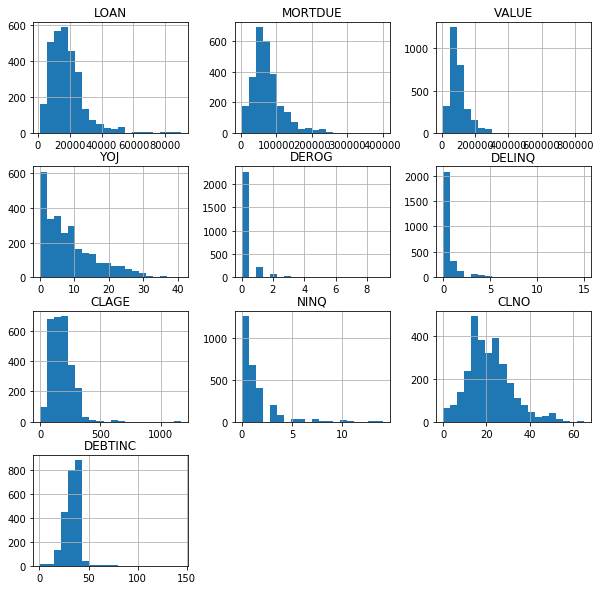

In [11]:
conn.sampling.srs(
    table   = dict(name = "hmeq_part", caslib = "Public"),
    samppct = 50,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

mysam = conn.CASTable(name = "mysam")
df = mysam.to_frame()
df[list(df)[1:-1]].hist(bins=20, figsize=(10,10))
plt.show()

In [12]:
parts = conn.simple.freq(
    table = dict(name = "hmeq_part", caslib = "Public"),
    inputs = "PARTIND"
)["Frequency"]

parts["Percent"] = parts["Frequency"]/df_cas.shape[0]
parts

,Column,NumVar,FmtVar,Level,Frequency,Percent
0,PARTIND,0.0,0,1,1788.0,0.3
1,PARTIND,1.0,1,2,4172.0,0.7


# Impute Missing Values

In [13]:
df_cas.distinct()['Distinct'][['Column', 'NMiss']]

,Column,NMiss
0,BAD,0.0
1,LOAN,0.0
2,MORTDUE,518.0
3,VALUE,112.0
4,REASON,252.0
5,JOB,279.0
6,YOJ,515.0
7,DEROG,708.0
8,DELINQ,580.0
9,CLAGE,308.0


In [14]:
impute_info = conn.dataPreprocess.impute(
    table = dict(name = "hmeq_part", caslib = "Public", where = 'partind = 1'),
    methodContinuous = 'MEDIAN',
    methodNominal    = 'MODE',
    inputs           = list(df_cas)[1:13],
    copyAllVars      = True,
    casOut           = dict(name = "train", replace = True),
    code = dict(casOut = dict(name = "score_code_impute", replace = True))
)

impute_info

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,LOAN,Median,IMP_LOAN,4172.0,0.0,16400.000000,
1,MORTDUE,Median,IMP_MORTDUE,3802.0,370.0,65608.500000,
2,VALUE,Median,IMP_VALUE,4087.0,85.0,89453.000000,
3,REASON,Mode,IMP_REASON,3985.0,187.0,NaN,DebtCon
4,JOB,Mode,IMP_JOB,3969.0,203.0,NaN,Other
5,YOJ,Median,IMP_YOJ,3797.0,375.0,7.000000,
6,DEROG,Median,IMP_DEROG,3668.0,504.0,0.000000,
7,DELINQ,Median,IMP_DELINQ,3758.0,414.0,0.000000,
8,CLAGE,Median,IMP_CLAGE,3960.0,212.0,171.958351,
9,NINQ,Median,IMP_NINQ,3812.0,360.0,1.000000,


In [15]:
int_vals = [x for x in list(impute_info["ImputeInfo"]["ImputedValueContinuous"]) if str(x) != 'nan']
nom_vals = [x for x in list(impute_info["ImputeInfo"]["ImputedValueNominal"]) if x!='']

conn.dataPreprocess.impute(
    table = dict(name = "hmeq_part", caslib = "Public", where = 'partind = 0'),
    inputs           = list(df_cas)[1:13],
    methodContinuous = 'VALUE',
    methodNominal    = 'VALUE',
    valuesInterval   = int_vals,
    valuesNominal    = nom_vals,
    copyAllVars      = True,
    casOut           = dict(name = "valid", replace = True)
)

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,LOAN,Value,IMP_LOAN,1788.0,0.0,16400.000000,
1,MORTDUE,Value,IMP_MORTDUE,1640.0,148.0,65608.500000,
2,VALUE,Value,IMP_VALUE,1761.0,27.0,89453.000000,
3,REASON,Value,IMP_REASON,1723.0,65.0,NaN,DebtCon
4,JOB,Value,IMP_JOB,1712.0,76.0,NaN,Other
5,YOJ,Value,IMP_YOJ,1648.0,140.0,7.000000,
6,DEROG,Value,IMP_DEROG,1584.0,204.0,0.000000,
7,DELINQ,Value,IMP_DELINQ,1622.0,166.0,0.000000,
8,CLAGE,Value,IMP_CLAGE,1692.0,96.0,171.958351,
9,NINQ,Value,IMP_NINQ,1638.0,150.0,1.000000,


# Get Variables

In [16]:
colinfo = conn.table.columninfo(table=dict(name = "train"))['ColumnInfo']
print(colinfo)

target = colinfo['Column'][0]

inputs = list(colinfo['Column'][1:])
nominals = list(colinfo.query('Type=="varchar"')['Column'])

inputs = [k for k in inputs if 'IMP_' in k]
nominals = [k for k in nominals if 'IMP_' in k]
nominals = [target] + nominals

display(target)
display(inputs)
display(nominals)

         Column Label  ID     Type  RawLength  FormattedLength Format  NFL  \
0           BAD         1   double          8               12           0   
1          LOAN         2   double          8               12           0   
2       MORTDUE         3   double          8               12           0   
3         VALUE         4   double          8               12           0   
4        REASON         5  varchar          7                7           0   
5           JOB         6  varchar          7                7           0   
6           YOJ         7   double          8               12           0   
7         DEROG         8   double          8               12           0   
8        DELINQ         9   double          8               12           0   
9         CLAGE        10   double          8               12           0   
10         NINQ        11   double          8               12           0   
11         CLNO        12   double          8               12  

'BAD'

['IMP_CLAGE',
 'IMP_CLNO',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_DEROG',
 'IMP_LOAN',
 'IMP_MORTDUE',
 'IMP_NINQ',
 'IMP_VALUE',
 'IMP_YOJ',
 'IMP_JOB',
 'IMP_REASON']

['BAD', 'IMP_JOB', 'IMP_REASON']

# Dimension Reduction

In [17]:
conn.loadActionSet('varReduce')
actions = conn.builtins.help(actionSet='varReduce')

NOTE: Added action set 'varReduce'.
NOTE: Information for action set 'varReduce':
NOTE:    varReduce
NOTE:       unsuper - Provides an action for performing unsupervised dimension reduction
NOTE:       super - Provides an action for performing supervised dimension reduction


In [18]:
varReduce_obj = conn.varReduce.unsuper(
    table = dict(name = "train"),
    inputs = inputs,
    nominals = nominals[1:],
    varexp = 0.95
)

In [19]:
varReduce_inputs = list(varReduce_obj['SelectedEffects']['Variable'])
varReduce_inputs

['IMP_VALUE',
 'IMP_REASON',
 'IMP_JOB',
 'IMP_DEROG',
 'IMP_YOJ',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_CLAGE',
 'IMP_NINQ',
 'IMP_LOAN',
 'IMP_CLNO']

In [20]:
print("The variable",list(set(inputs) - set(varReduce_inputs))[0],"was removed from the input list.")

The variable IMP_MORTDUE was removed from the input list.


# Logistic Regression

In [21]:
conn.loadActionSet('regression')
actions = conn.builtins.help(actionSet='regression')

NOTE: Added action set 'regression'.
NOTE: Information for action set 'regression':
NOTE:    regression
NOTE:       glm - Fits linear regression models using the method of least squares
NOTE:       genmod - Fits generalized linear regression models
NOTE:       logistic - Fits logistic regression models
NOTE:       logisticType3 - computes Type 3 or Joint tests that all parameters for an effect are zero
NOTE:       logisticCode - writes SAS DATA step code for computing predicted values of the fitted model
NOTE:       genmodScore - creates a table on the server that contains results from scoring observations by using a fitted model
NOTE:       logisticScore - creates a table on the server that contains results from scoring observations by using a fitted model
NOTE:       glmScore - creates a table on the server that contains results from scoring observations by using a fitted model
NOTE:       logisticAssociation - computes indices of rank correlation between predicted probabilities and 

In [22]:
lr_model = conn.regression.logistic(
    table    = dict(name = "train"),
    classVars = nominals[1:],
    model = dict(depvar=target, effects=varReduce_inputs, dist='binomial', link='logit'),
    store    = dict(name='lr_model',replace=True),
    code = dict(casOut = dict(name = "score_code_model", replace = True))
)

NOTE: Convergence criterion (FCONV=1E-7) satisfied.
NOTE: 451016 bytes were written to the table "lr_model" in the caslib "CASUSER(jobake)".


In [23]:
lr_score = conn.regression.logisticScore(
    table    = dict(name = "valid"),
    restore = "lr_model",
    casout = dict(name="lr_scored", replace=True),
    copyVars = target
)

In [24]:
lr_assess = conn.percentile.assess(
   table = 'lr_scored',
   inputs = "_PRED_",
   casout = dict(name="lr_assess",replace=True),
   response = target,
   event = "1"
)

display(conn.table.fetch(table="lr_assess", to=3))
conn.table.fetch(table="lr_assess_ROC", to=3)

,_Column_,_Event_,_Depth_,_Value_,_NObs_,_NEvents_,_NEventsBest_,_Resp_,_RespBest_,_Lift_,_CumResp_,_CumRespBest_,_CumLift_,_CumLiftBest_,_PctResp_,_PctRespBest_,_CumPctResp_,_CumPctRespBest_,_Gain_,_GainBest_
0,_PRED_,1,5.0,0.712915,90.0,72.0,90.0,21.884498,27.355623,4.376900,21.884498,27.355623,4.376900,5.471125,80.000000,100.0,80.000000,100.0,3.376900,4.471125
1,_PRED_,1,10.0,0.432270,90.0,47.0,90.0,14.285714,27.355623,2.857143,36.170213,54.711246,3.617021,5.471125,52.222222,100.0,66.111111,100.0,2.617021,4.471125
2,_PRED_,1,15.0,0.345295,90.0,32.0,90.0,9.726444,27.355623,1.945289,45.896657,82.066869,3.059777,5.471125,35.555556,100.0,55.925926,100.0,2.059777,4.471125


,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_,_FNR_
0,_PRED_,1,0.00,329.0,1459.0,0.0,0.0,1.00000,0.000000,0.0,1.000000,0.184004,0.815996,0.310817,0.810779,0.621559,0.631085,0.186755,0.815996,0.00000
1,_PRED_,1,0.01,328.0,1450.0,1.0,9.0,0.99696,0.006169,0.0,0.993831,0.188479,0.815523,0.311343,0.810779,0.621559,0.631085,0.186755,0.811521,0.00304
2,_PRED_,1,0.02,328.0,1437.0,1.0,22.0,0.99696,0.015079,0.0,0.984921,0.195749,0.814164,0.313276,0.810779,0.621559,0.631085,0.186755,0.804251,0.00304


In [25]:
lr_assess_ROC = conn.CASTable(name = "lr_assess_ROC")
lr_assess_ROC = lr_assess_ROC.to_frame()
lr_assess_ROC['Model'] = 'Logistic Regression CAS'
cutoff_index = round(lr_assess_ROC['_Cutoff_'],2)==0.5
lr_assess_ROC = lr_assess_ROC[cutoff_index].reset_index(drop=True)
lr_metrics_cas = pd.DataFrame([["Logistic Regression CAS", 1-lr_assess_ROC['_ACC_'][0], lr_assess_ROC['_C_'][0]]], columns=["Model", "Misclassification", "Area Under Curve"])
lr_metrics_cas

,Model,Misclassification,Area Under Curve
0,Logistic Regression CAS,0.14821,0.810779


# Get Pipeline DATA Step Score Code

In [26]:
conn.dataStep.runCode(code='''
    data score_code_impute (keep = DataStepSrc);
        set score_code_impute;
    run;
'''
)

score_code_impute = conn.CASTable(name = "score_code_impute")
score_code_impute = score_code_impute.to_frame()

In [27]:
conn.dataStep.runCode(code='''
    data score_code_model (keep = DataStepSrc);
        set score_code_model;
    run;
'''
)

score_code_model = conn.CASTable(name = "score_code_model")
score_code_model = score_code_model.to_frame()

In [28]:
score_code = score_code_impute["DataStepSrc"][0] + "\n\n\n\n\n\n\n\n\n\n" + score_code_model["DataStepSrc"][0]
print(score_code)

   _ngbys_ = 1;
   _igby_ = 0;
   _tnn_ntrans_ = 1;

   _fuzcmp_ = 2.22044604925e-10;

   array _tnn_vnames_{10}  _temporary_ ; 
   _tnn_vnames_{1} = IMP_LOAN; 
   _tnn_vnames_{2} = IMP_MORTDUE; 
   _tnn_vnames_{3} = IMP_VALUE; 
   _tnn_vnames_{4} = IMP_YOJ; 
   _tnn_vnames_{5} = IMP_DEROG; 
   _tnn_vnames_{6} = IMP_DELINQ; 
   _tnn_vnames_{7} = IMP_CLAGE; 
   _tnn_vnames_{8} = IMP_NINQ; 
   _tnn_vnames_{9} = IMP_CLNO; 
   _tnn_vnames_{10} = IMP_DEBTINC; 

   array _vnn_names_{10} _temporary_; 
   _vnn_names_{1} = CLAGE; 
   _vnn_names_{2} = CLNO; 
   _vnn_names_{3} = DEBTINC; 
   _vnn_names_{4} = DELINQ; 
   _vnn_names_{5} = DEROG; 
   _vnn_names_{6} = LOAN; 
   _vnn_names_{7} = MORTDUE; 
   _vnn_names_{8} = NINQ; 
   _vnn_names_{9} = VALUE; 
   _vnn_names_{10} = YOJ; 

   array _tnn_ntransvars_{1}  _temporary_   (10 ); 


   array _tv_nn_indices_{10}  _temporary_   (6 7 9 10 5 4 1 8 2 3 ); 

   IMP_LOAN = .;
   IMP_MORTDUE = .;
   IMP_VALUE = .;
   IMP_YOJ = .;
   IMP_DEROG = .;
   I

# End Session

In [29]:
conn.session.endSession()

+ Elapsed: 0.00442s, user: 0.00334s, sys: 0.00572s, mem: 1.03mb